In [1]:
import os   #used for directory work
import matplotlib.patches as mpatches #used for plot legends
import matplotlib.pyplot as plt #used for creating plots
import matplotlib.cm as cm
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#path="/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-1/sonics/" #79 location
#path= "/home/JoeySeitz/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-2/sonics/"  #134 location
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-2/sonics/"
def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    return txt_files

In [24]:
print("W full-average:",np.mean(df["W"]))
print("W cut-average:",np.mean(df["W"][:16000]))
print("W cut-average:",np.average(df["W"][:16000]))
print()
print("U full-average:",np.mean(df["U"]))
print("U cut-average:",np.mean(df["U"][:16000]))
print()
print("V full-average:",np.mean(df["V"]))
print("V cut-average:",np.mean(df["V"][:16000]))
print()
print("T full-average:",np.mean(df["T"]))
print("T cut-average:",np.mean(df["T"][:16000]))


NameError: name 'df' is not defined

In [3]:
def calculations(df, n):
   
    U_average = np.mean(df["U"][:n])
    V_average = np.mean(df["V"][:n])
    W_average = np.mean(df["W"][:n])
    T_average = np.mean(df["T"][:n])

    tke_lst, V_prime, U_prime, W_prime, T_prime = [], [], [], [], []
    for i in range(len(df)):
        tke_lst.append(((df["U"][i] - U_average)**2 +(df["V"][i] - V_average)**2 + (df["W"][i]-W_average)**2)/2)
        V_prime.append(df["V"][i]-V_average)
        U_prime.append(df["U"][i]-V_average)
        W_prime.append(df["W"][i]-W_average)
        T_prime.append(df["T"][i]-T_average)
        
    return tke_lst, W_prime, T_prime, V_prime, U_prime 

In [26]:
tke_lst, W_prime, T_prime, V_prime, U_prime  = calculations(df,16000)

NameError: name 'df' is not defined

In [4]:
def tke_plots(df,file_name,n):
    tke_lst, W_prime, T_prime, V_prime, U_prime  = calculations(df,n)
    #figure
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 10)

    ax = plt.subplot(1,1,1)

    #labels
    ax.set_xlabel(r'Perturbation Temperature ($^{\circ}C$) ', fontsize=10)
    ax.set_ylabel(r'Perturbation Vertical Wind Speed ($\frac{m}{s}$)',rotation =90, fontsize=10 )
    title= r"T${}'$ vs W${}'$ with TKE "+ file_name[:2]
    ax.set_title(title, fontsize = 14)

    #c sequence
    c = tke_lst
    #cm = plt.cm.get_cmap('jet')
    cm = plt.cm.get_cmap('viridis_r')
    #cm = plt.cm.get_cmap('gnuplot')
    #plot
    plt.hlines(0,-50,100,linestyle= "--",  linewidth=.5)
    plt.vlines(0,-10,10,linestyle= "--",  linewidth=.5)
    plt.scatter( T_prime, W_prime , c=c, 
                cmap =cm, alpha = .7, s= 12 )# s = df['T']*.5, alpha =0.5)
    cbar = plt.colorbar(pad=0)
    cbar.set_label(r'TKE ($\frac{m^{2}}{s^{2}}$)', rotation=45, fontsize=10)
    
    plt.clim(0,10)
    cbar.set_ticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.xlim(-5,100)
    plt.ylim(-3,5)
    plt.show()
    fig.savefig(str(file_name[:2])+'TKE_plot.png')

In [28]:
for i in range(len(all_files)-1):
    df = pd.read_csv(path + txt_files[i],na_values = ['NAN', "00nan"], sep="\t")
    tke_plots(df,all_files[i],16000)

NameError: name 'all_files' is not defined

In [5]:
def tke_grid(path,n,burn,seperator = " "):
    cm = plt.cm.get_cmap('viridis_r')
    fig, axs = plt.subplots(nrows=4,ncols=4)#, sharex=True, sharey=True)
    fig.set_size_inches(20, 16)
    txt_files = text_finder(path)
    x=0
    for col in range(4):
        for row in range(4):
            #read in the data and compute means
            df = pd.read_csv(path + txt_files[x],na_values = ['NAN', "00nan"], sep=seperator)  
            tke_lst, W_prime, T_prime, V_prime, U_prime  = calculations(df,n)
            
            #create the scatter subplots
            ax = axs[ col, row]
            pcm =ax.scatter(T_prime, W_prime , c=tke_lst, 
                cmap =cm, alpha = .8, s= 8,vmin = 0, vmax=10)

            #Set the colorbar
            cbar = fig.colorbar(pcm, ax = ax, pad =0)
            cbar.set_label(r'TKE ($\frac{m^{2}}{s^{2}}$)', rotation=0, fontsize=10)
            #titles and formating 
            ax.set_title(txt_files[x][:2], fontsize = 14)
            ax.set_xlabel(r"T${}'$($^{\circ}C$) ", fontsize=12)
            ax.set_ylabel(r"W ${}'$ ($\frac{m}{s}$)",rotation =90, fontsize=12,labelpad=0 )
            ax.hlines(0,-50,100,linestyle= "--",  linewidth=.5)
            ax.vlines(0,-10,10,linestyle= "--",  linewidth=.5)
            ax.set_ylim(-3,5)
            ax.set_xlim(-5,100)
            x=x+1 #used to change the files

    #adjust the spacingof the plots 
    plt.subplots_adjust(hspace=.3,wspace=.3)       
    fig.suptitle(burn+' Perturbation Temperature by Perturbation Verticle Wind Speed With TKE ', fontsize = 22, x=0.5, y=0.92)
    cbar.set_ticks([0,1,2,3,4,5,6,7,8,9,10])

    fig.savefig(burn+"_T-W-tke_Grid.png",dpi=250)

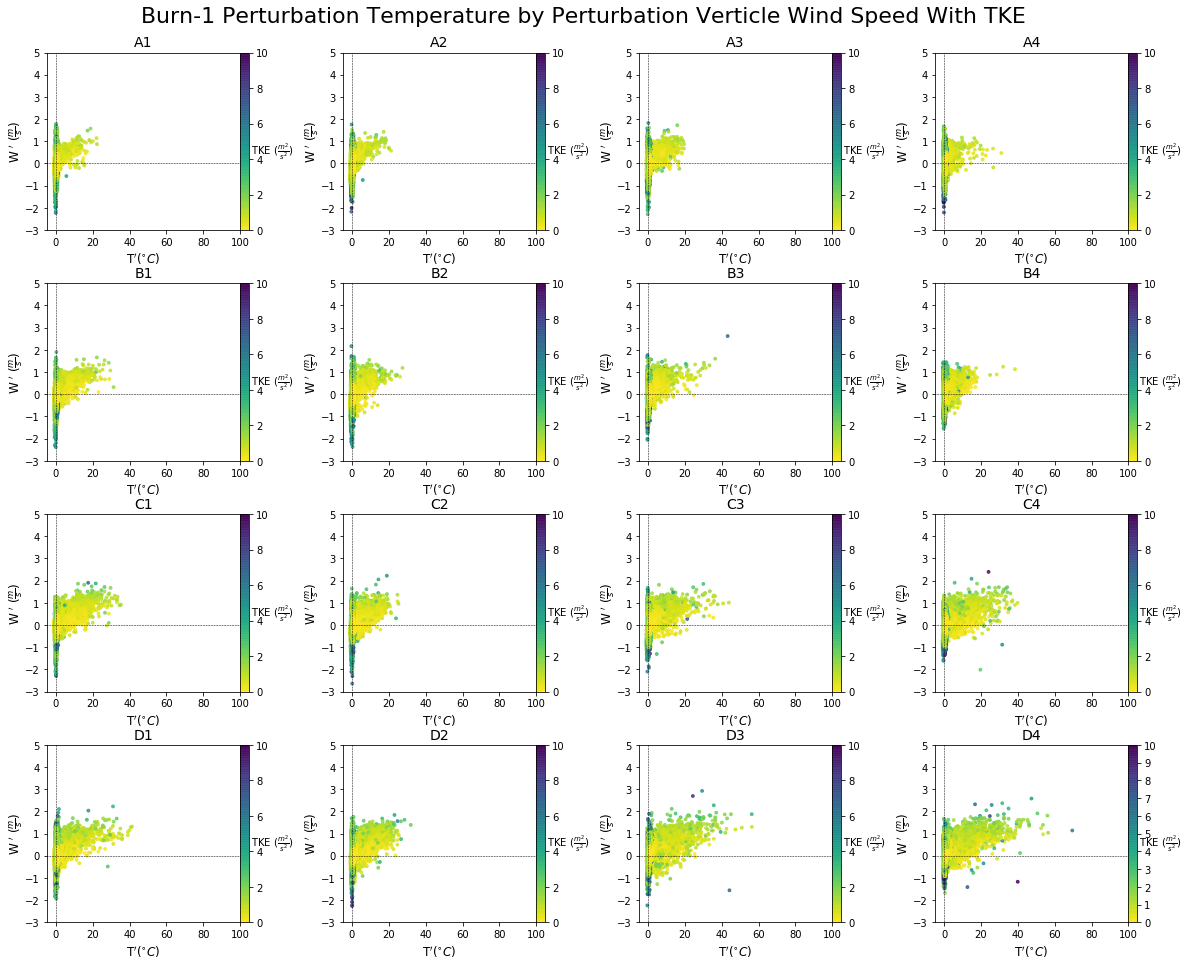

In [30]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-1/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-1/sonics/"
tke_grid(path,21000 ,"Burn-1","\t")

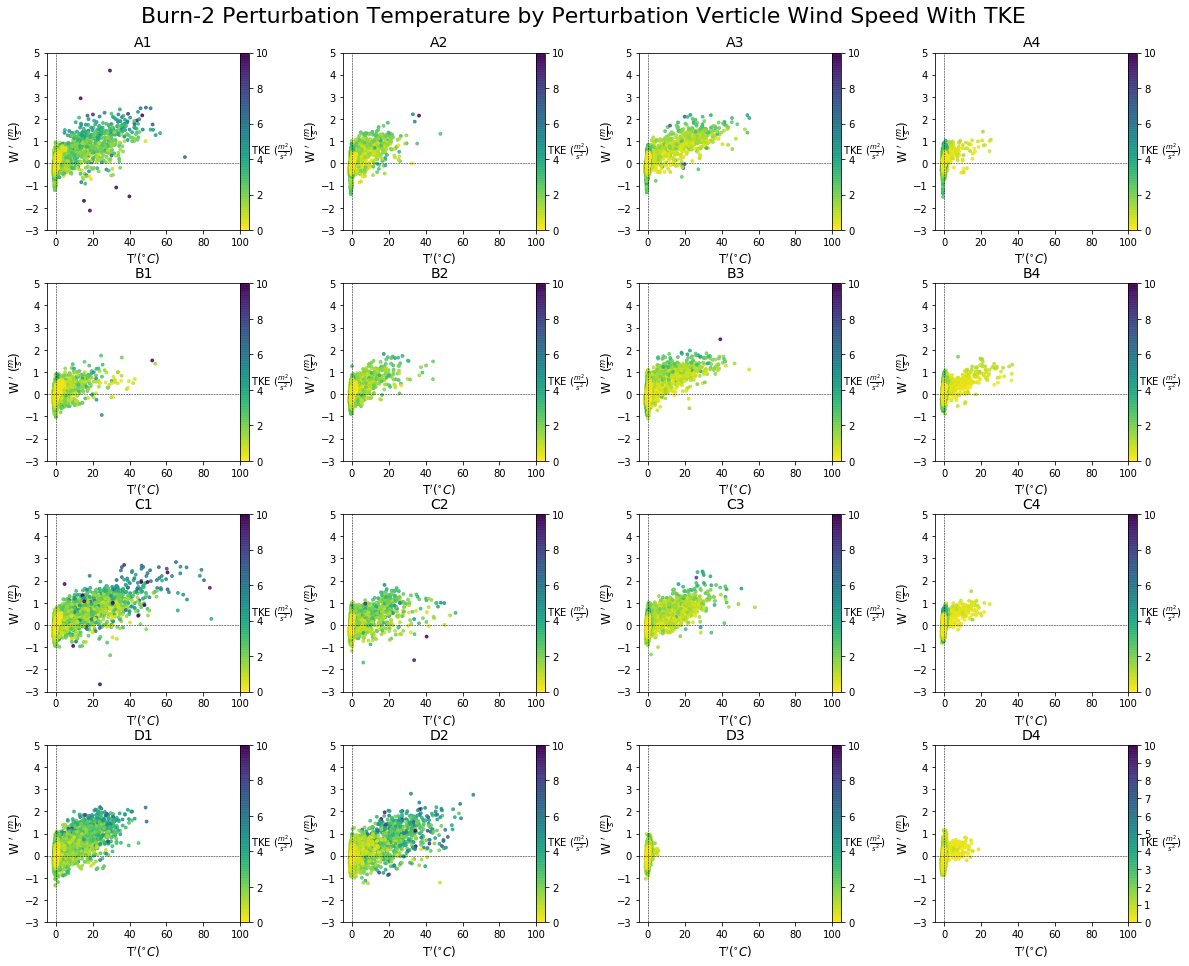

In [31]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-2/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-2/sonics/"
tke_grid(path,16000,"Burn-2","\t")

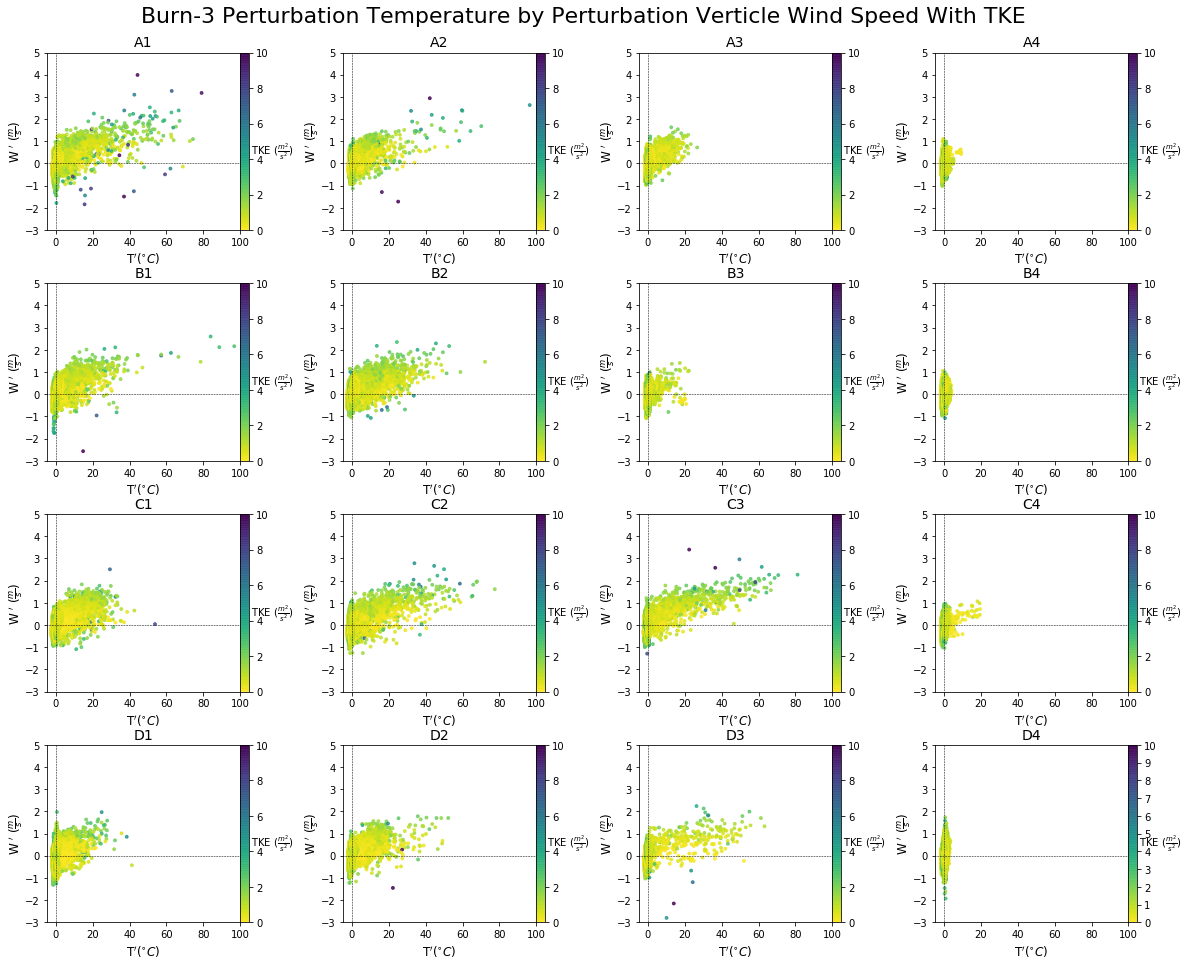

In [32]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-3/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-3/sonics/"
tke_grid(path,25000 ,"Burn-3","\t")

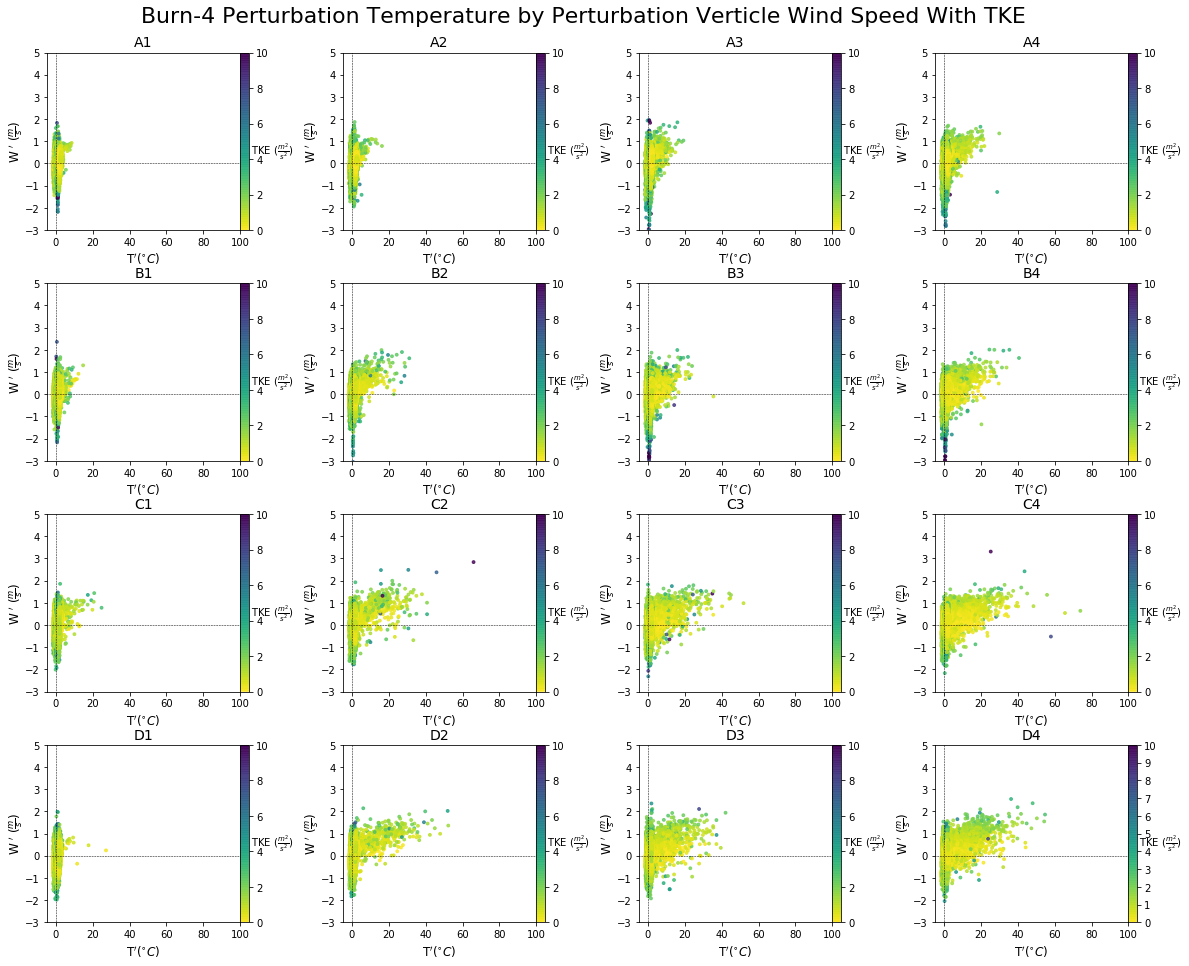

In [33]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-4/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-4/sonics/"
tke_grid(path,30000 ,"Burn-4","\t")

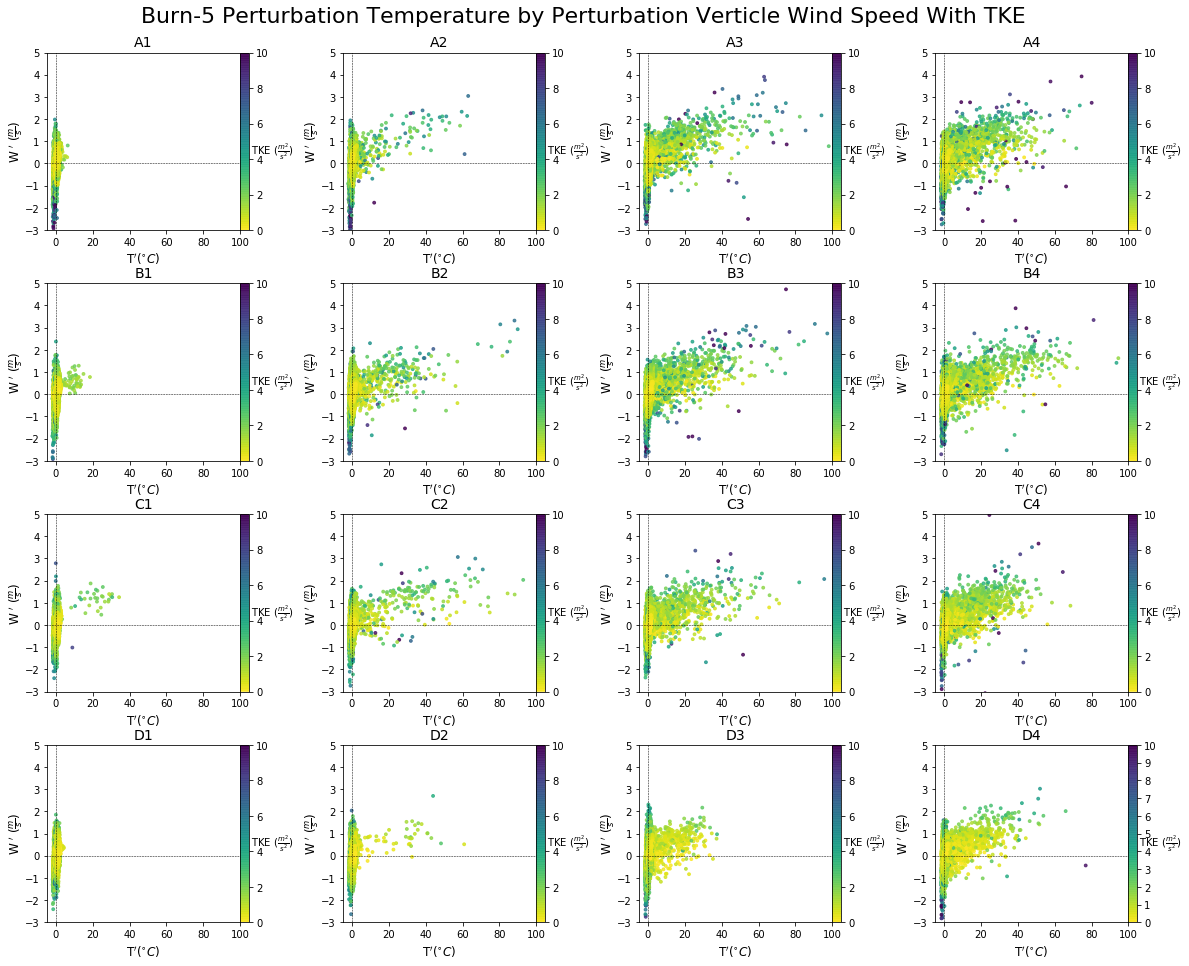

In [34]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-5/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-5/sonics/"
tke_grid(path,16000 ,"Burn-5","\t")

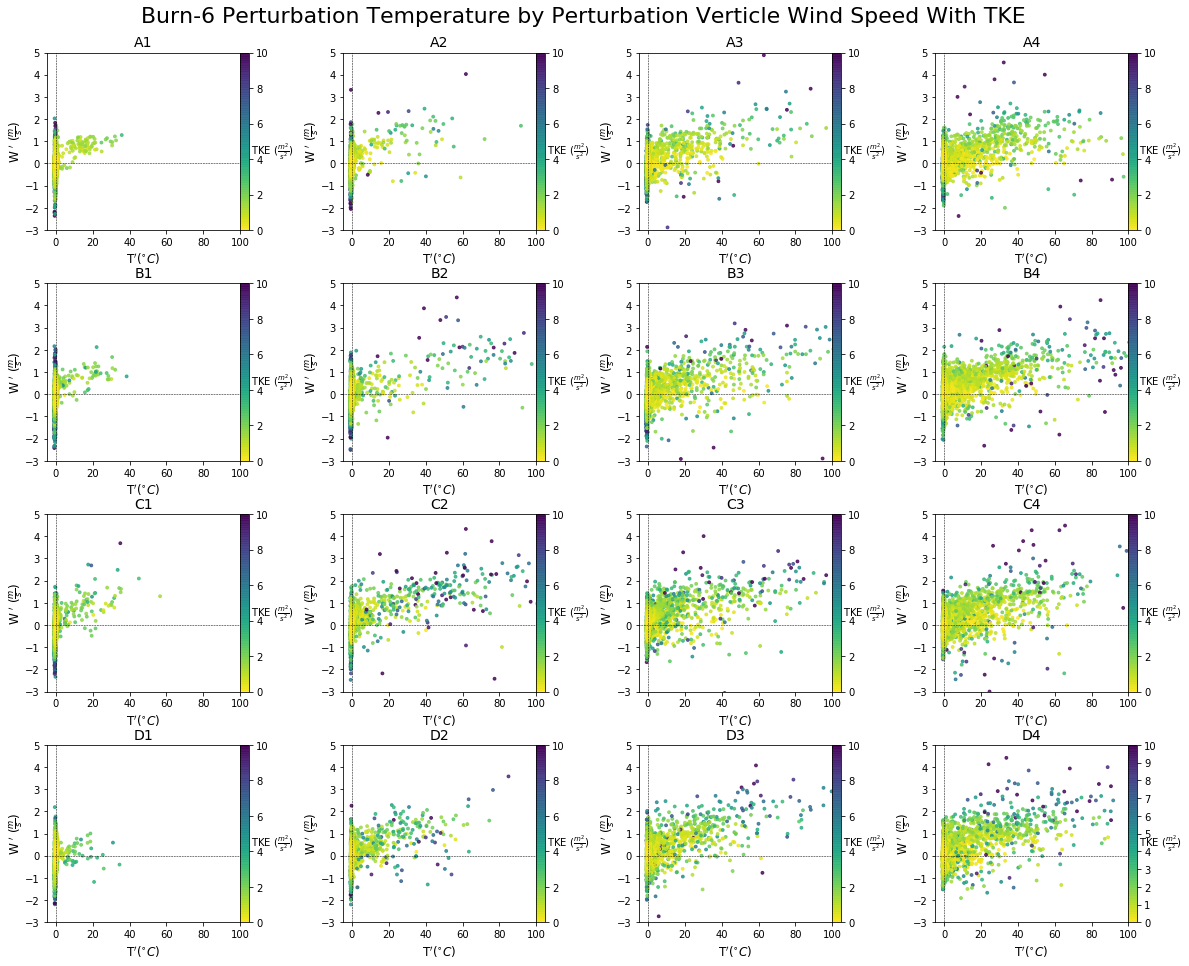

In [35]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-6/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-6/sonics/"
tke_grid(path,5000 ,"Burn-6","\t")

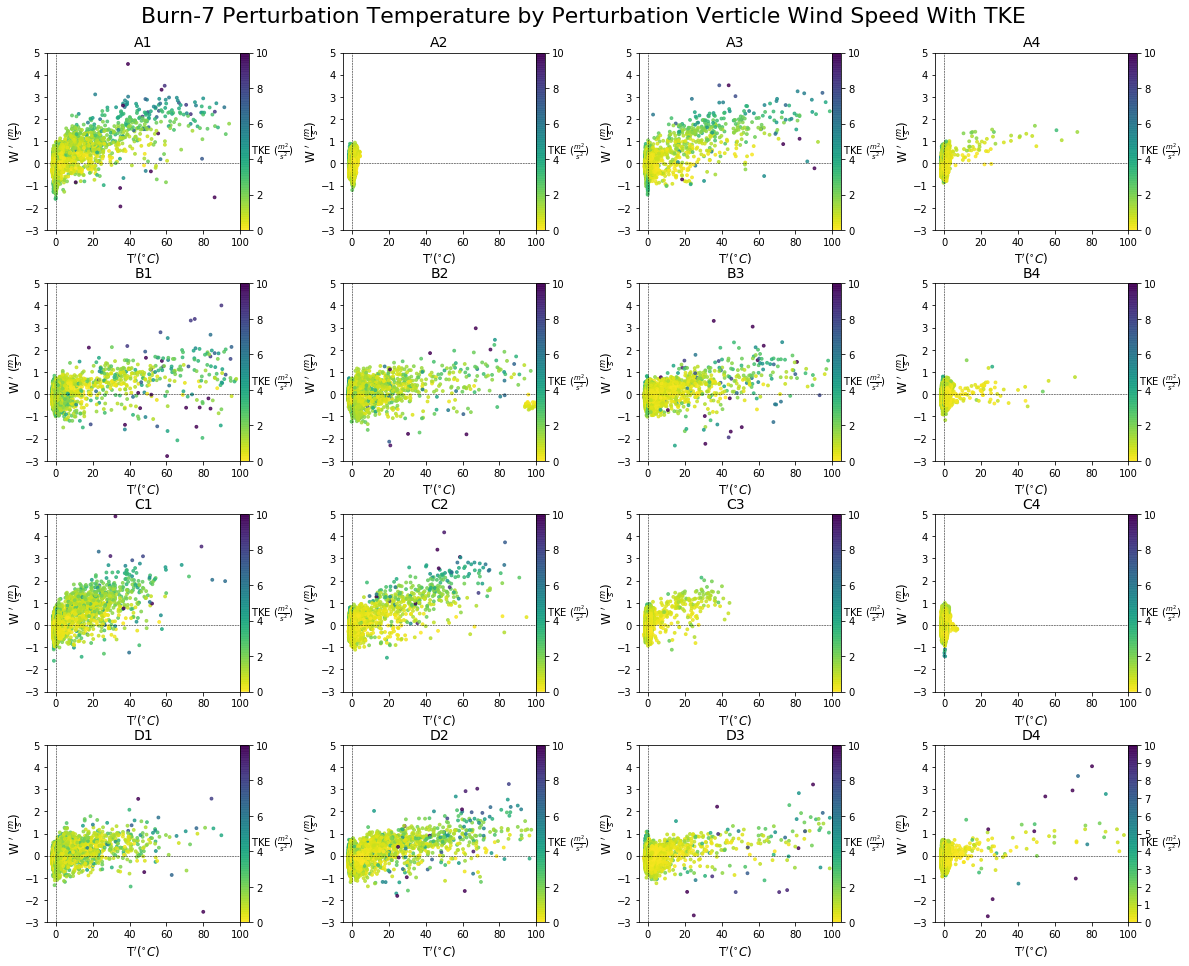

In [6]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-7/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-7/sonics/"
tke_grid(path,25000 ,"Burn-7",)

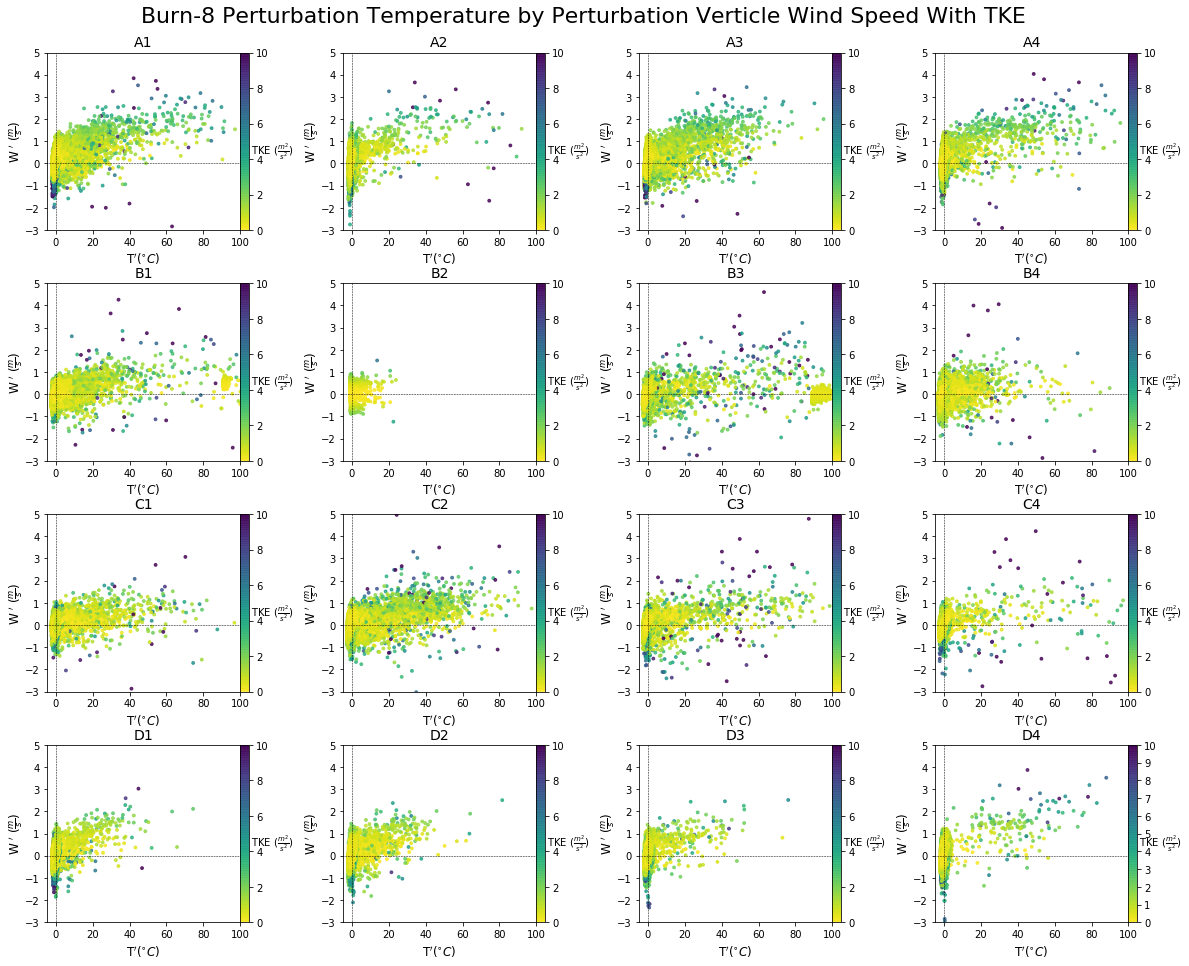

In [7]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-8/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-8/sonics/"
tke_grid(path,18000 ,"Burn-8","\t")

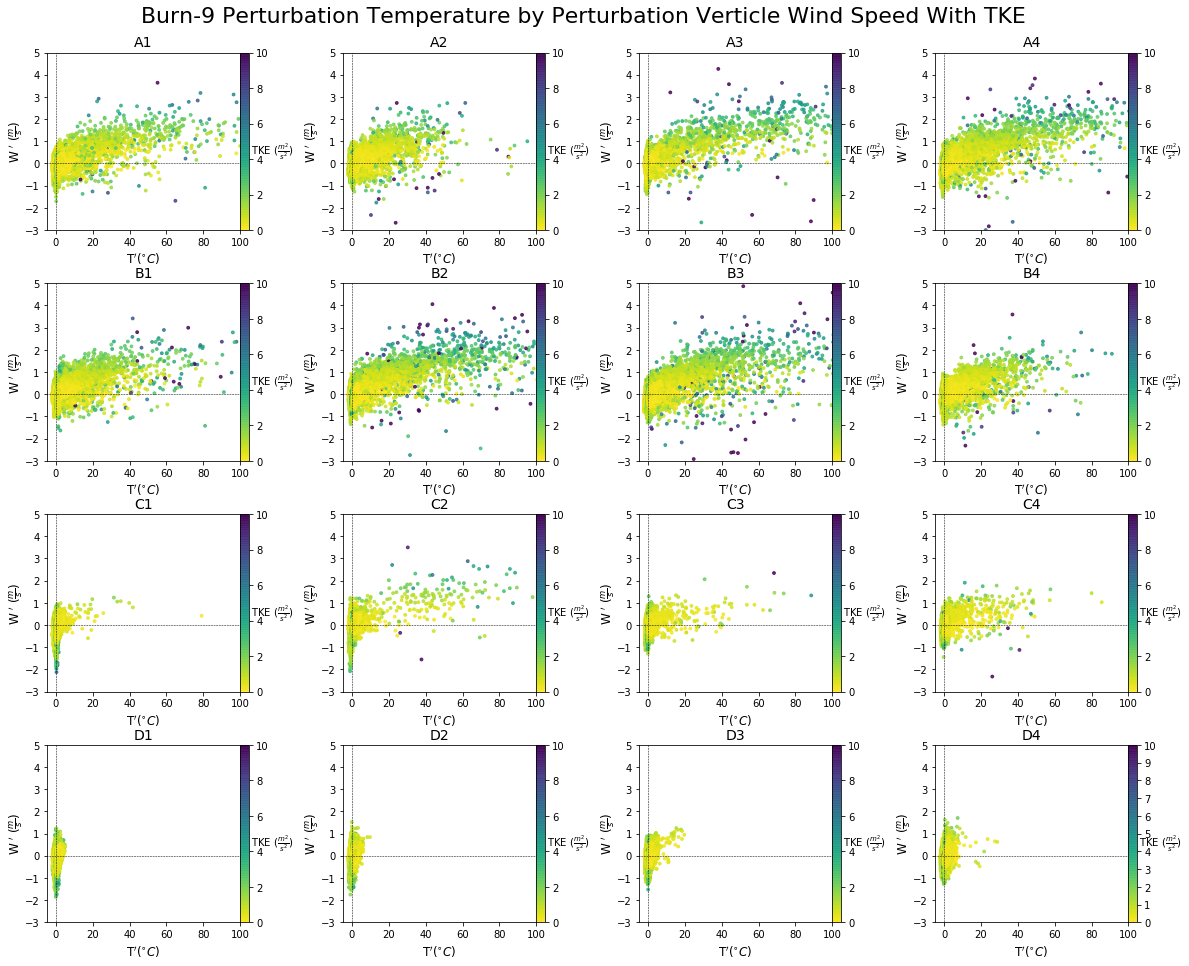

In [38]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-9/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-9/sonics/"
tke_grid(path,20000 ,"Burn-9")

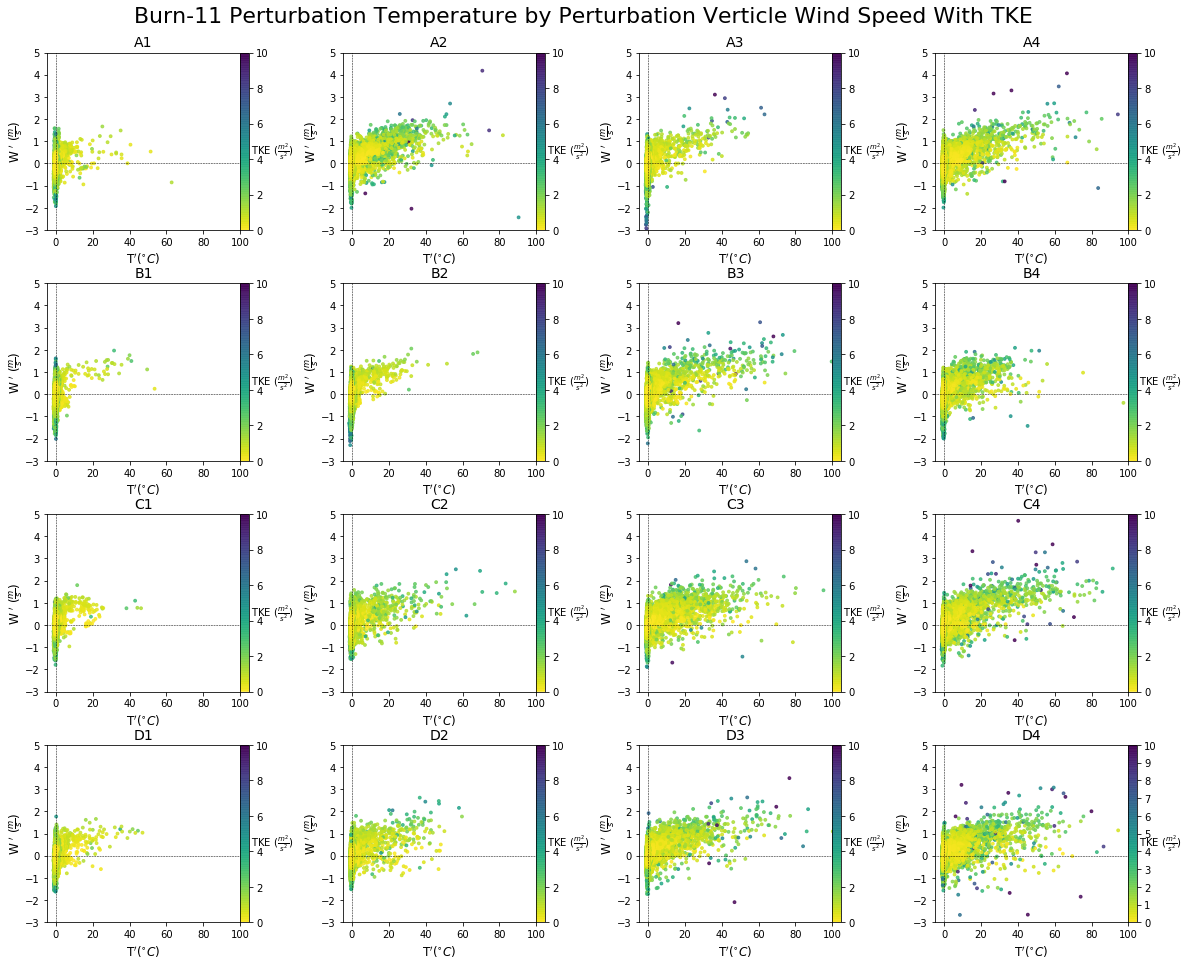

In [39]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-11/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-11/sonics/"
tke_grid(path,30000 ,"Burn-11")

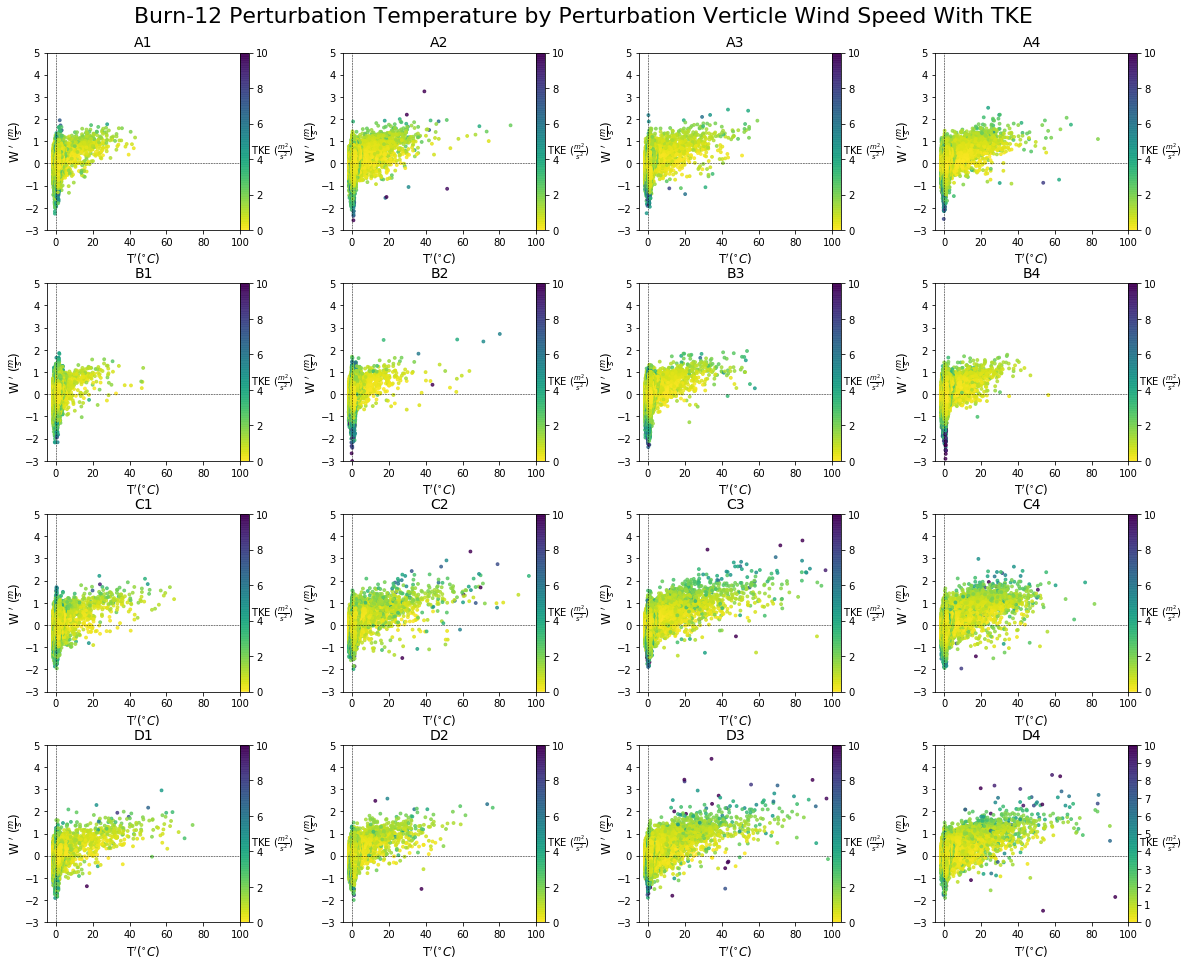

In [40]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-12/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-12/sonics/"
tke_grid(path,30000 ,"Burn-12")

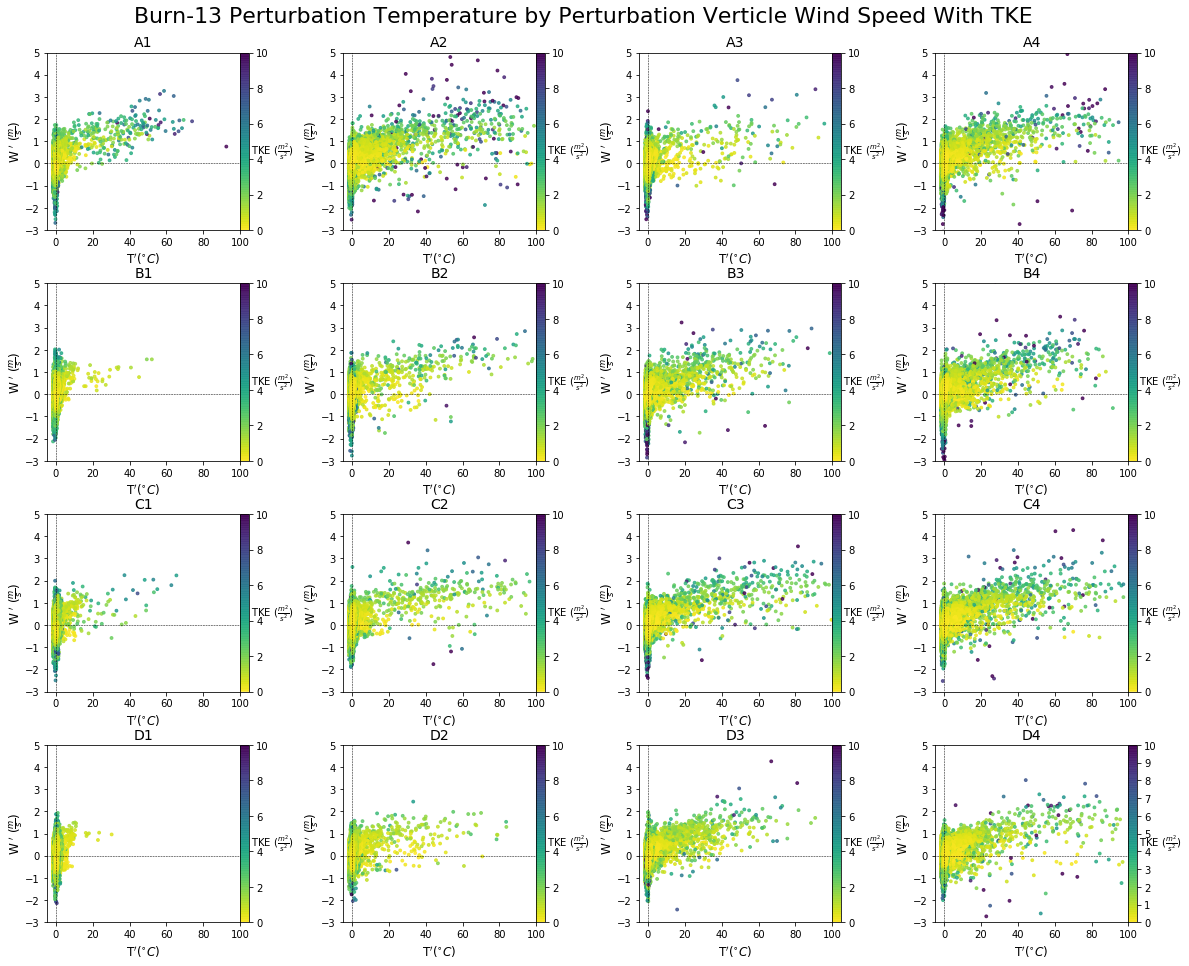

In [41]:
#path = "/Users/joeyp/Desktop/Forestry/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-13/sonics/"
path = "/home/joey/Desktop/10X10_Truss_SERDP_Burns_May_2018/JS_Cleaned_Data/Burn-13/sonics/"
tke_grid(path,50000 ,"Burn-13")